In this notebook, I try to explore the topic EDA.

**EDA(Exploratory Data Analysis)-** This helps to gain a strong understanding of the data like:
- Summarize the data
- Trends and meaning in the data
- Variation among the features and output
- Determining which ML algorithm to use. 

Before moving into step by step coding, I want to highlight one term:
    
**Data Profiling:** This term refers to summarizing the data using descriptive statistics. 

The link to the data can be found here - 

https://archive.ics.uci.edu/ml/datasets/Automobile

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import ensemble, tree, linear_model
import missingno as msno
import seaborn as sns
import scipy.stats as st

In [2]:
#While reading the data am making Header = None as by default, the pandas considers the first row as header(Column Names)
data = pd.read_csv(r"./Automobiles.data",header=None)

### Basic Description of Data

In [3]:
#Basic decription of the data
data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


 The pandas library shows the value for Unique,top, freq if it is a categorical data. It is Numeric, it shows mean,std,min,max
 and the Quartiles.


From the above data, few quick observation that I can make is:

- The pandas is considering 2nd Column(1) as a categorical data due to presence of the missing values.
- The numeric columns are in various ranges. We need to standardize all the numercial columns to bring all the columns within same range.
- The standard deviation(applicable to the numerical columns) helps us understand, the variation about the mean. We see that in few columns, the variation is high(like column 16).
- The dataset has 26 features.

In [4]:
#Lets check what is the shape of our data 
data.shape

(205, 26)

So, we have 205 instances of data, each having 26 features. 

In [5]:
#Lets see first few example and last examples 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Lets rename the header from numeric numbers 0-25 to actual names(Please check Automobiles.names file)

In [7]:
data = data.rename(columns={
    0:  "symboling",
    1:  "normalized-losses",
    2:  "make",
    3:  "fuel-type",
    4:  "aspiration",
    5:  "num-of-doors",
    6:  "body-style",
    7:  "drive-wheels",
    8:  "engine-location",
    9:  "wheel-base",
    10: "length",
    11: "width",
    12: "height",
    13: "curb-weight",
    14: "engine-type",
    15: "num-of-cylinders",
    16: "engine-size",
    17: "fuel-system",
    18: "bore",
    19: "stroke",
    20: "compression-ratio",
    21: "horsepower",
    22: "peak-rpm",
    23: "city-mpg",
    24: "highway-mpg",
    25: "price" 
})

In [8]:
#numeric features
data.describe(include=[np.number])

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
#Categorical features
data.describe(include=[object])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


From the description given in Automobiles.names file, the columns with missing values are (along with number of missing values):- 

 [
    - "normalized-losses" : 41,
    - "num-of-doors" : 2,
    - "bore" : 4,
    - "stroke" : 4,
    - "horsepower" : 2,
    - "peak-rpm" : 2,
    - "price" : 4
 ]

So these classes get considered as categorical/object data columns, even though they appear to be numeric.

In [10]:
#lets confirm for one of the column if null values are present as such.
np.count_nonzero(data[data['price'] == "?"]['price'])

4

In [11]:
#Lets replace the missing values as NaN from "?"
data[data.eq("?")] = np.nan

data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,7609
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Missing Data Matrix

<AxesSubplot:>

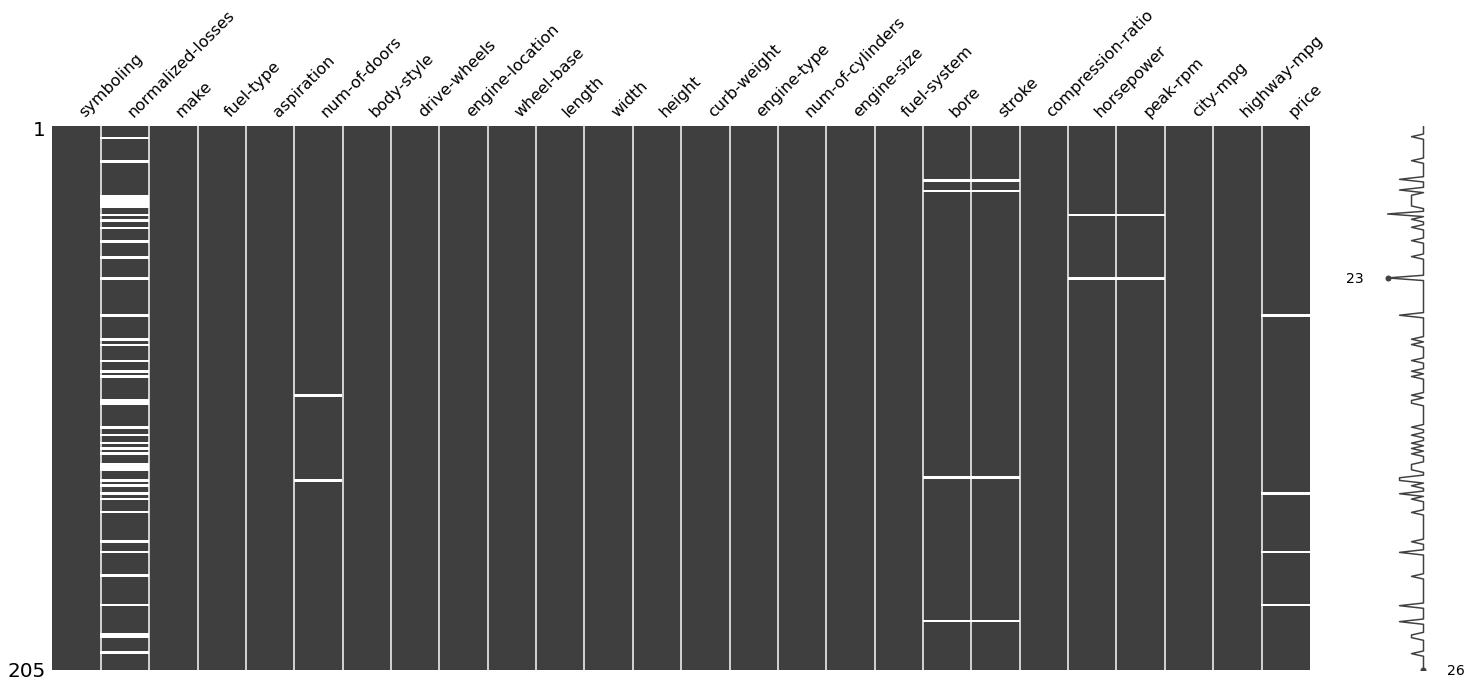

In [12]:
msno.matrix(data.sample(205))

The above graph, helps us in visualizing the empty missing values(NaN) for the instances from the data. 

**Note:** The white lines in the graph denote a missing value

### bar chart

<AxesSubplot:>

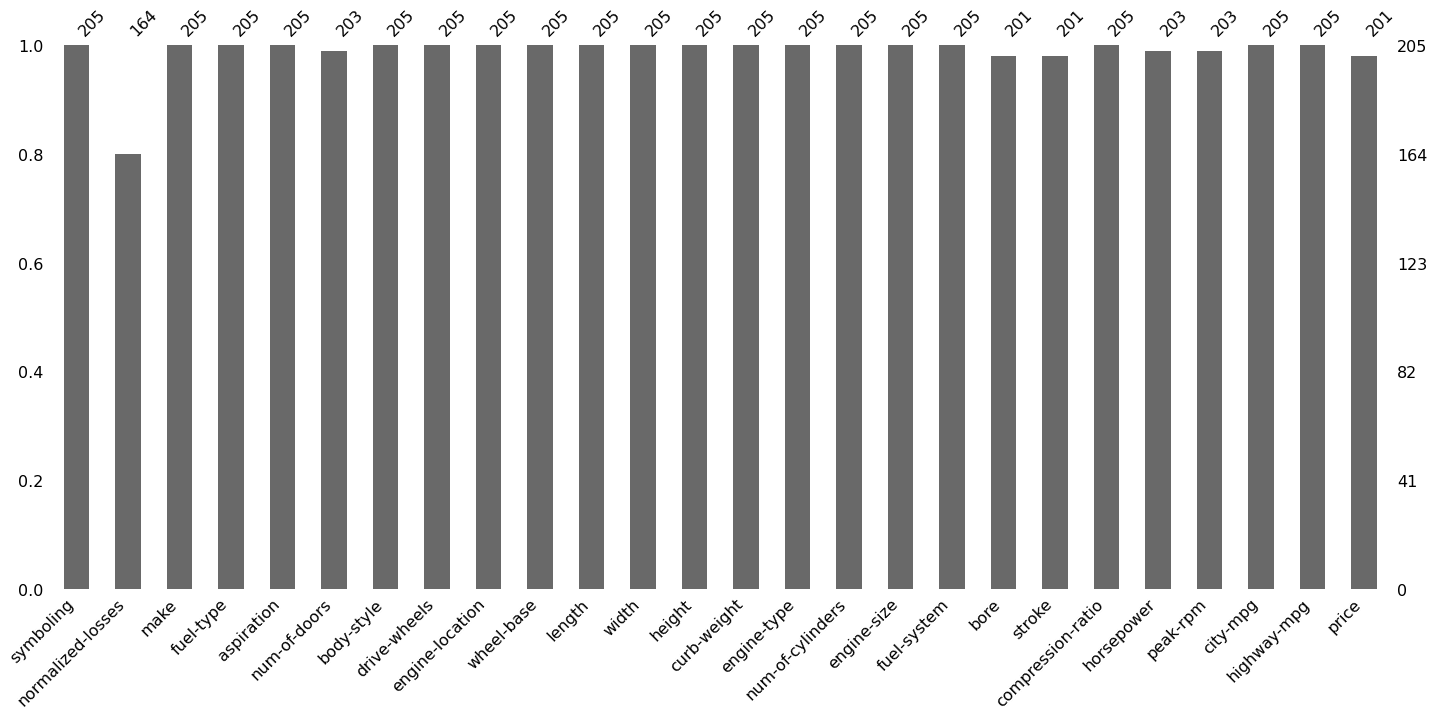

In [13]:
#more simpler way of representing/understanding the nullity data is given by:
msno.bar(data.sample(205))

**Note:** The numbers at the top row indicate the number of values present in each columns. 

### Heatmap

<AxesSubplot:>

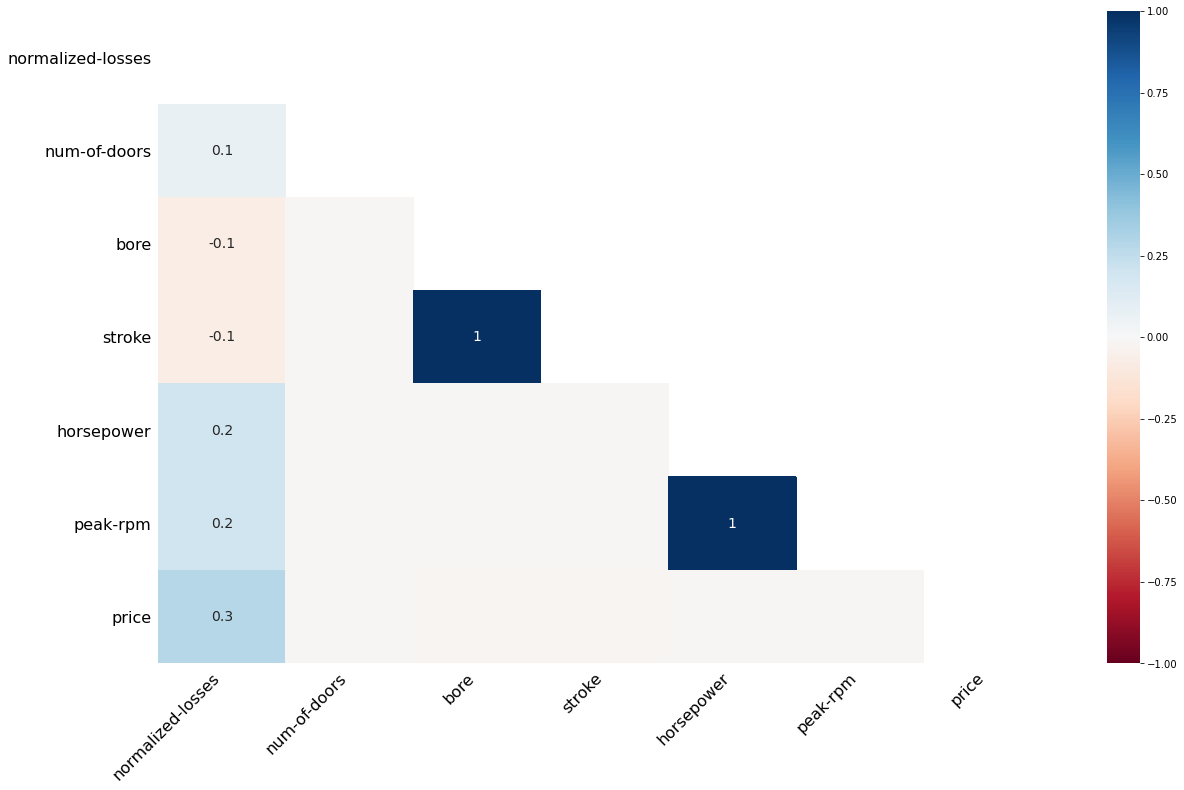

In [14]:
msno.heatmap(data)

The heatmap specifies the nullity correlation among the features.

The values can range from **"-1 to 1"**.

**1** - If null value appears in one feature, then it must also appear in another. 
*Example:* Horsepower and peark-rpm columns. (we can confirm this with the matrix plot)

**0** - The appearance of null value in one feature does not affect another.

**-1** - If null value appears in one feature, then it will never appear in another.


 


**Note:** The features which has all the values does not play a role in heatmap

### Dendogram (hierarchical correlation)

<AxesSubplot:>

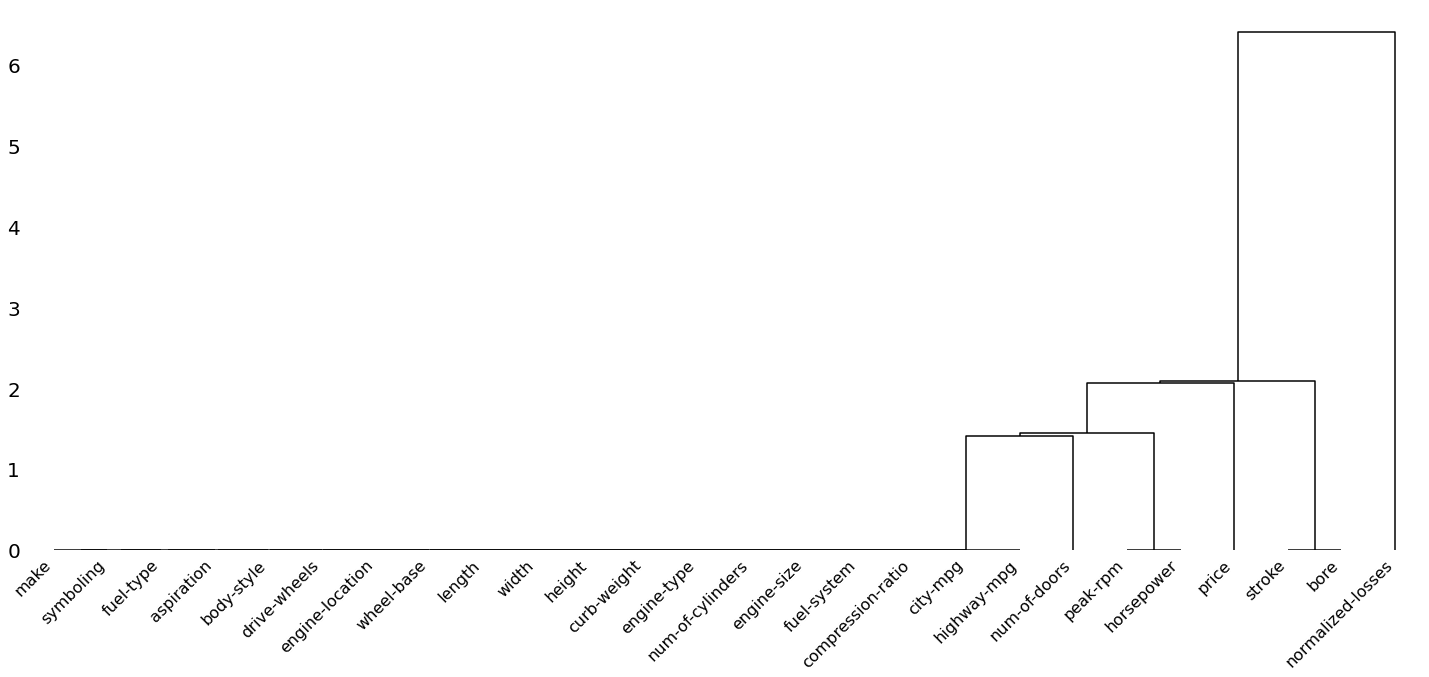

In [15]:
msno.dendrogram(data,orientation="top")

The dendrogram allows to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

for more information read this - 
https://github.com/ResidentMario/missingno

<AxesSubplot:>

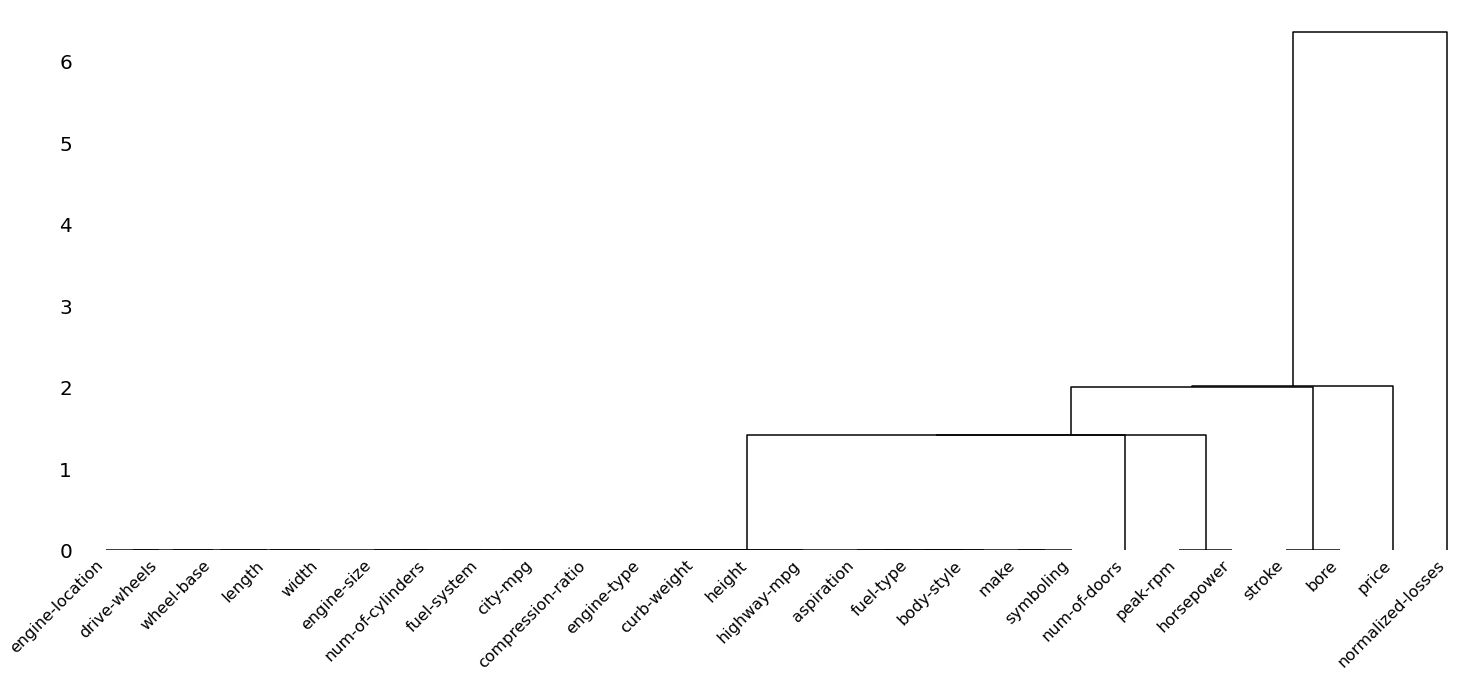

In [16]:
#checking different ways of calculating the distance in dendogram

msno.dendrogram(data,orientation="top",method="centroid")

<AxesSubplot:>

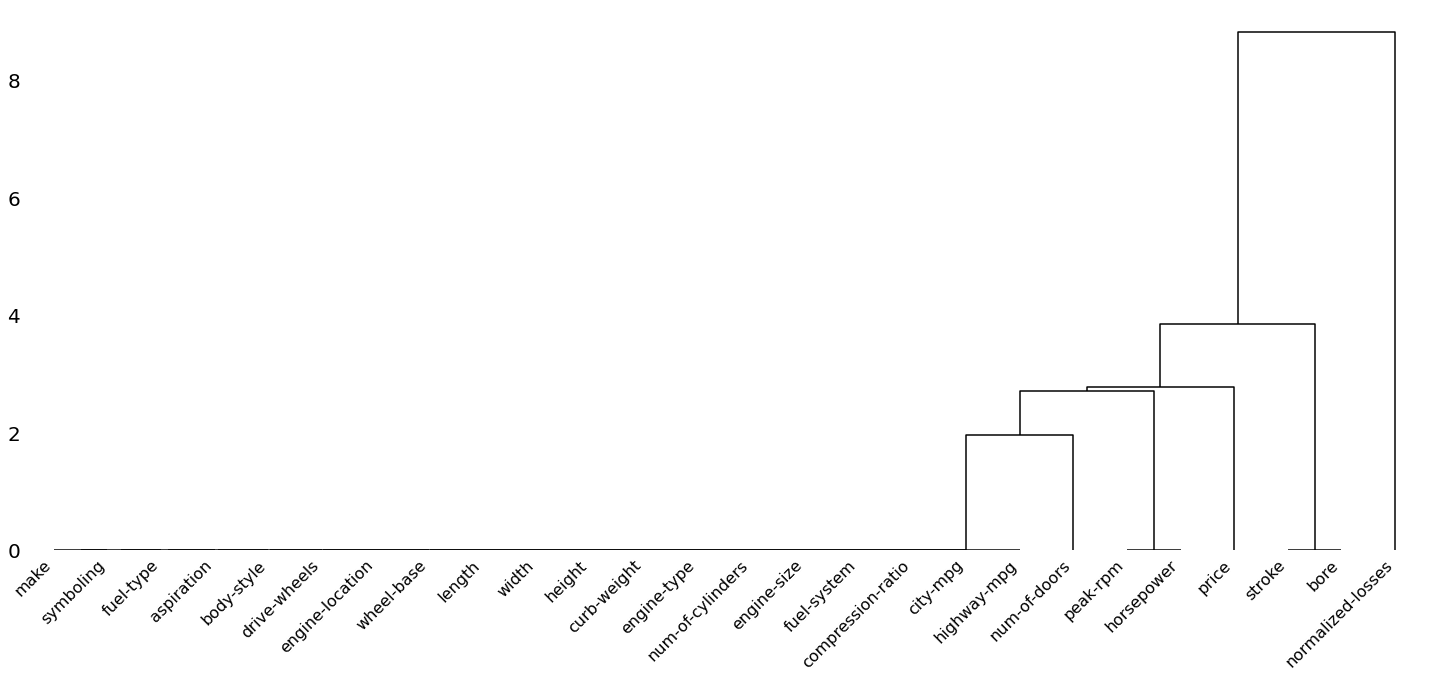

In [17]:
msno.dendrogram(data,orientation="top",method="ward")

For more information on dendograms(Also on Agglomerative &  Divisive Clustering), please read - 

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

### Skewness

In [18]:
data.skew(axis=0)

symboling            0.211072
normalized-losses    0.765976
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
bore                 0.020016
stroke              -0.683122
compression-ratio    2.610862
horsepower           1.391029
peak-rpm             0.073237
city-mpg             0.663704
highway-mpg          0.539997
price                1.809675
dtype: float64

The skewness of the data indicates how the data is distributed about its mean. It is a measure of asymmetry.
Above i have calculated skewness for each column. 

- If skewness is between **-0.5 - 0.5** then the data is somewhat is symmetrical. 
- If skewness is between **(-1 - -0.5)** or **(0.5 - 1)** then the data is moderately skewed.
- If skewness is greater than **>1** or **<-1** then the data can be considered as highly skewed

**Note:** The postive value of skewness means, the data is right skewed and negative value indicates it is left skewed.

- If the data set is skewed to the right, the mean is greater than the mode, and so subtracting the mode from the mean gives a positive number. A similar argument explains why data skewed to the left has negative skewness.(Pearson's first coefficient of skewness)

- Pearson’s second coefficient of skewness is also used to measure the asymmetry of a data set. For this quantity, we subtract the mode from the median, multiply this number by three and then divide by the standard deviation.

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

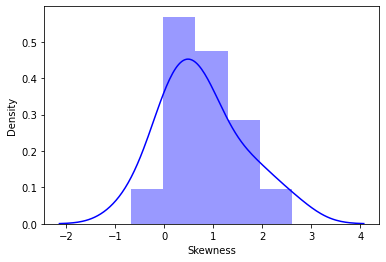

In [19]:
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')

The data is somewhat unskewed, but not perfectly. It appears as if the data is fractionally right skewed

### Kutrosis

In [20]:
data.kurt()

symboling           -0.676271
normalized-losses    0.525440
wheel-base           1.017039
length              -0.082895
width                0.702764
height              -0.443812
curb-weight         -0.042854
engine-size          5.305682
bore                -0.828945
stroke               2.074243
compression-ratio    5.233054
horsepower           2.623280
peak-rpm             0.056526
city-mpg             0.578648
highway-mpg          0.440070
price                3.231537
dtype: float64

Kurtosis is a statistical measure used to describe the degree to which scores cluster in the tails or the peak of a frequency distribution. 

There are three types of Kurtosis:-

- **leptokurtic distribution(Kurtosis>3):** The data is concentrated around mean or at the extreme ends. 
- **Platykurtic distribution(Kurtosis<3):** Fewer values in the tails and fewer values close to the mean.
- **Mesokurtic distribution(Kurtosis=3):** Distributions that are moderate in breadth and curves with a medium peaked height.

<img src="./Kurtosis.png">

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

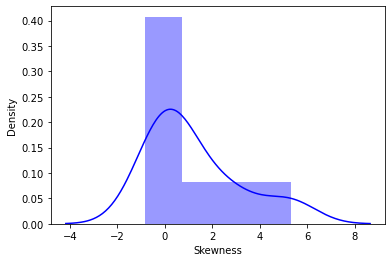

In [21]:
sns.distplot(data.kurt(),color='blue',axlabel ='Skewness')

The data appears to be kind of between mesokurtic and platykurtic.

### Univariate Visualization using different distributions fit.

#### Price Column

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

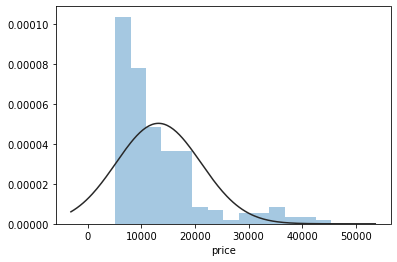

In [22]:
sns.distplot(data["price"],kde=False,fit=st.norm)

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

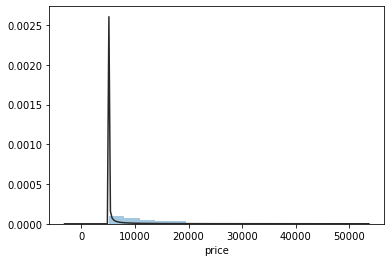

In [23]:
sns.distplot(data["price"],kde=False,fit=st.lognorm)

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

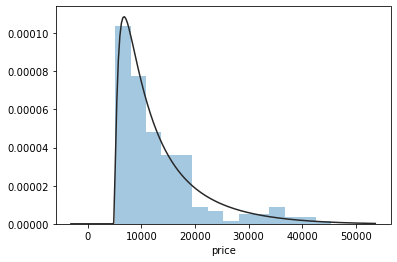

In [24]:
sns.distplot(data["price"],kde=False,fit=st.johnsonsb)

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

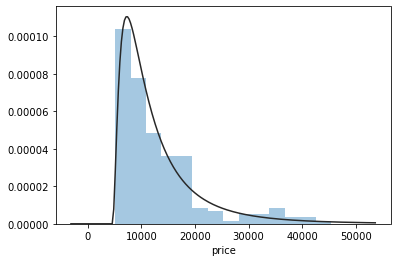

In [25]:
sns.distplot(data["price"],kde=False,fit=st.johnsonsu)

From the above figures, it is clear that the price does not follow normal distribution, and transforming usin Log Normal is also not helpful.

The best fit is obtained for both Johnson SB(Bounded) and SU(Unbounded).However, if we oberve carefully, the fit using Johnson SB is better, since the peak aligns with the peak of the data.

#### compression-ratio Column

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compression-ratio'>

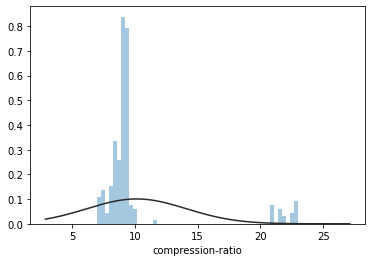

In [26]:
sns.distplot(data["compression-ratio"],kde=False,fit=st.norm)

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compression-ratio'>

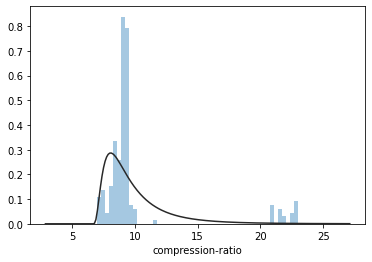

In [27]:
sns.distplot(data["compression-ratio"],kde=False,fit=st.johnsonsb)

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compression-ratio'>

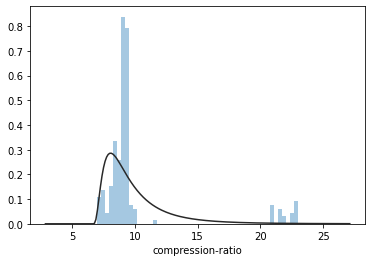

In [28]:
sns.distplot(data["compression-ratio"],kde=False,fit=st.lognorm)

The compression ratio, does not fit properly for any of the Johnson Distribution , normal or lognormal distribution.

So, let me try to use box-cox tranformation to check if it gets converted to normal distribution. 

<img src="./box_cox_transformation.png" />

The box cox tranformation tries to find the value of lambda(between -5 to 5) to find the best fit to convert to normal distribution

The value for the lambda is: -3.0701036111613083


C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

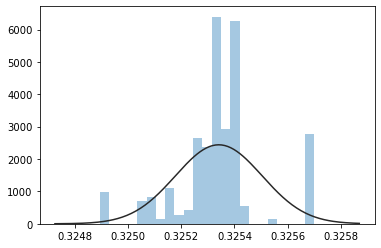

In [29]:
transformed_compression_ratio,lambda_ = st.boxcox(data["compression-ratio"])

print("The value for the lambda is:",lambda_)

sns.distplot(transformed_compression_ratio,kde=False,fit=st.johnsonsb)

So even with Box-cox tranformation the normal distribution does not fit properly.

Read this blog to understand the importance of normal distribution before applying regression - 
https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

In [30]:
numeric_features = data.select_dtypes(include=[np.number])

categorical_features = data.select_dtypes(include=[object])

## Numerical Features

In [31]:
correlation_numeric = numeric_features.corr()

### Correlation Heat Map

<AxesSubplot:>

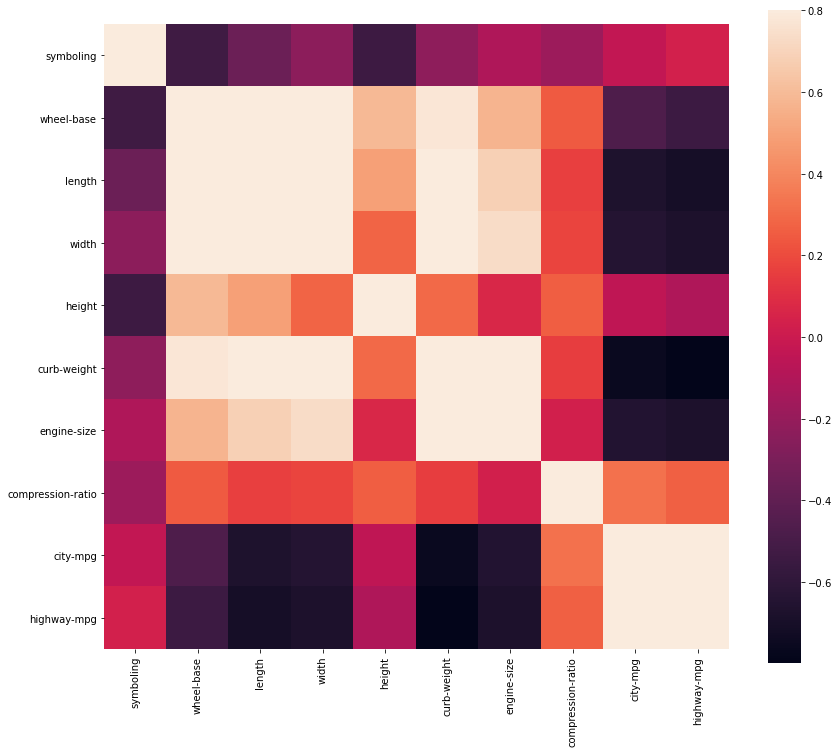

In [32]:
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation_numeric,square = True,  vmax=0.8)

The above heatmap gives a fair understanding how each feature is related to one another and to what extent(numerical features).

With the heatmap, we can determine multicollinearity among the features. 
- Two or more features are said to be multicollinear if their cooreleation value is +1 or -1. 
- These are those features which can be predicted with the help of other features. (can be considered redundant features, whose removal wont affect the prediction)


### Zoomed Correlation Heatmap

<AxesSubplot:>

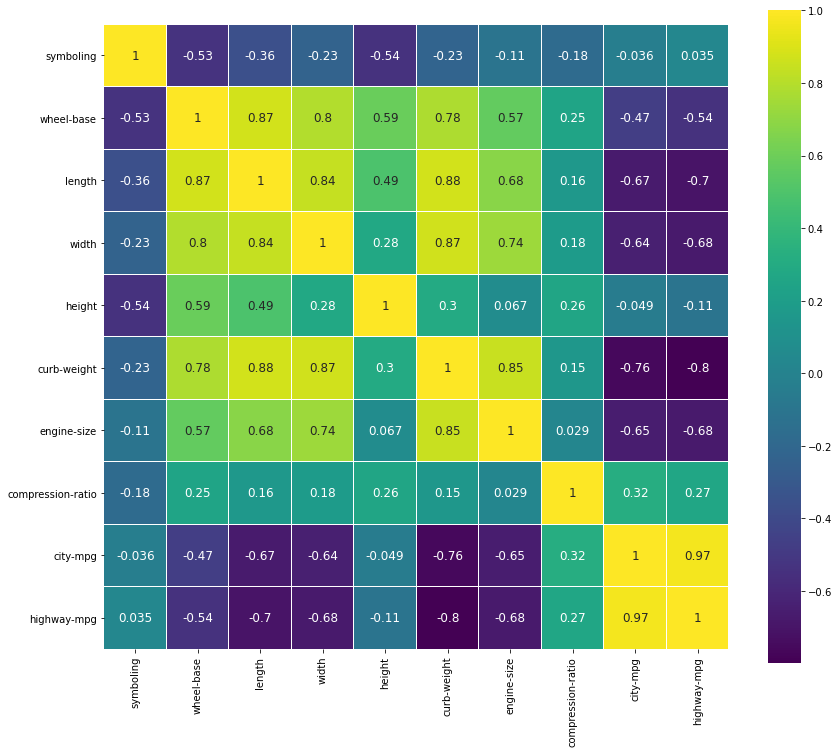

In [33]:
columns = correlation_numeric.index

corr_matrix = np.corrcoef(data[columns].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(corr_matrix, vmax=1, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = columns.values ,annot_kws = {'size':12},yticklabels = columns.values)

From the above i can quickly make following observations (Note, i have specifically not chosen target feature for this data-multiple columns possible as a target feature):

- wheel-base and length are highly correlated.Also, Highway-mpg & city-mpg
- The length and height are somewhat correlated but we need further analysis to confirm they are correlated. 

The correlation between two features is calculated by Pearson's correlation formula.

<img src="./pearsons_correlation.png" />


positive correlation (relating to pearsons r-coefficient) - in that as X increases Y also increases and the closer to +1 indicating a strong positive linear relationship.

For negative correlation values - as X increases Y tends to decrease implying if a value has close to -1 then that is a strong negative linear relationship.

**Note:** For further analysis, i am going to consider curb-weight as our target feature.

So, The features, 
- wheel-base, length, width, engine-size are positively correlated to *curb-weight*
- city-mpg, highway-mpg are negatively correlated to *curb-weight*

### Pair plot

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


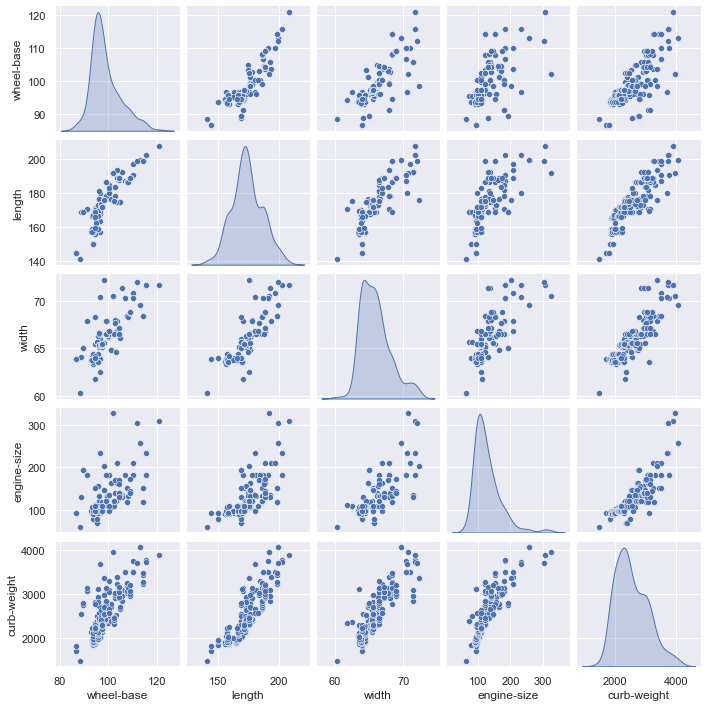

In [34]:
#Pair plot related to positive correlations
sns.set()
columns = ['wheel-base','length','width','engine-size','curb-weight']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


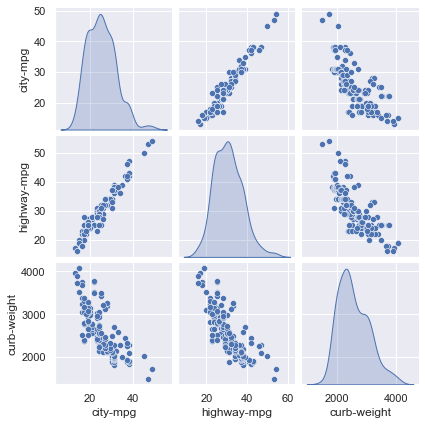

In [35]:
#Pair plot related to negative correlations
sns.set()
columns = ['city-mpg', 'highway-mpg','curb-weight']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

The quick observation that we can make from the above plot of positive & negative correlations of the data is that, The positive correlations vary linearly with the curb-weight. (has positive slop) while the negative correlations also varies linearly but has negative slope.

### Missing Values

In [36]:
#Checking for empty/null values in numeric features.
numeric_features.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
dtype: int64

So, the numeric features does not have any missing values.

## Categorical Features

In [37]:
#Checking for empty/null values in categorical features.
total = categorical_features.isnull().sum().sort_values(ascending=False)

#calculate the percentage of missing  values per feature
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.head(20)

,Total Missing Count,% of Total Observations
normalized-losses,41,0.200000
bore,4,0.019512
stroke,4,0.019512
price,4,0.019512
num-of-doors,2,0.009756
horsepower,2,0.009756
peak-rpm,2,0.009756
make,0,0.000000
fuel-type,0,0.000000
aspiration,0,0.000000


So from above, we can see that the missing percentage of values are quite less. 
The normalized-loss column has the highest missing percentage with 0.2%

### BoxPlots

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


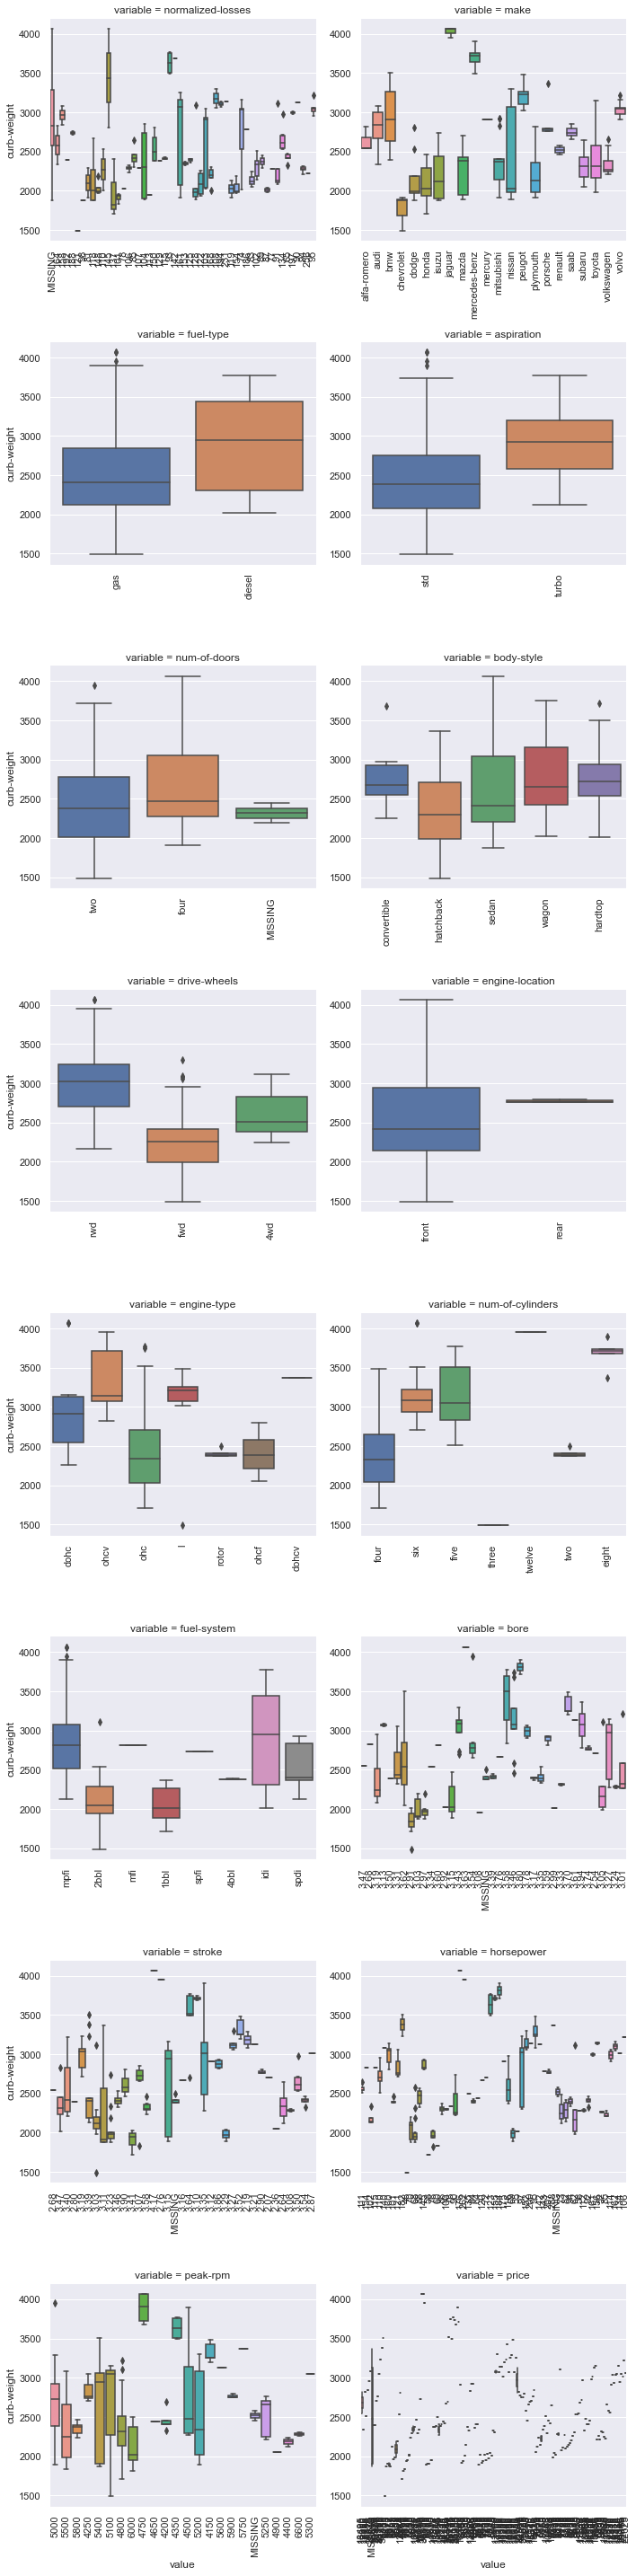

In [38]:
for c in categorical_features:
    data[c] = data[c].astype('category')
    if data[c].isnull().any():
        data[c] = data[c].cat.add_categories(['MISSING'])
        data[c] = data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['curb-weight'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "curb-weight")